<a href="https://colab.research.google.com/github/sodiq-sulaimon/Preparations-for-TensorFlow-Developer-Certification/blob/main/Training_with_ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the horse or human dataset training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-10-13 00:51:56--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M  21.8MB/s    in 7.6s    

2023-10-13 00:52:04 (18.7 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]



In [2]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-10-13 00:52:04--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip.1’

validation-horse-or 100%[===================>]  10.95M  9.01MB/s    in 1.2s    

2023-10-13 00:52:05 (9.01 MB/s) - ‘validation-horse-or-human.zip.1’ saved [11480187/11480187]



In [3]:
# Unzip the downloaded dataset
import zipfile

# Unzip the training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip the validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [4]:
# Define directories for the training data

import os

# Directory with the training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with the training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with the validation horse pictures
validation_horse_dir = os.path.join('validation-horse-or-human/horses')

# Directory with the validation horse pictures
validation_human_dir = os.path.join('validation-horse-or-human/humans')

In [5]:
# Let's explore the images in the directories
train_horse_names = os.listdir(train_horse_dir)
print(f'Train set horses: {train_horse_names[:5]}')

train_human_names = os.listdir(train_human_dir)
print(f'Train set humans: {train_human_names[:5]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'Validation set horses: {validation_horse_names[:5]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'Validation set human: {validation_human_names[:5]}')

Train set horses: ['horse14-4.png', 'horse08-6.png', 'horse15-8.png', 'horse28-9.png', 'horse18-8.png']
Train set humans: ['human09-12.png', 'human14-16.png', 'human02-16.png', 'human14-04.png', 'human15-07.png']
Validation set horses: ['horse5-342.png', 'horse5-076.png', 'horse4-403.png', 'horse3-099.png', 'horse4-072.png']
Validation set human: ['valhuman05-24.png', 'valhuman02-01.png', 'valhuman05-22.png', 'valhuman05-25.png', 'valhuman02-13.png']


In [6]:
# The total number of images in the directories
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


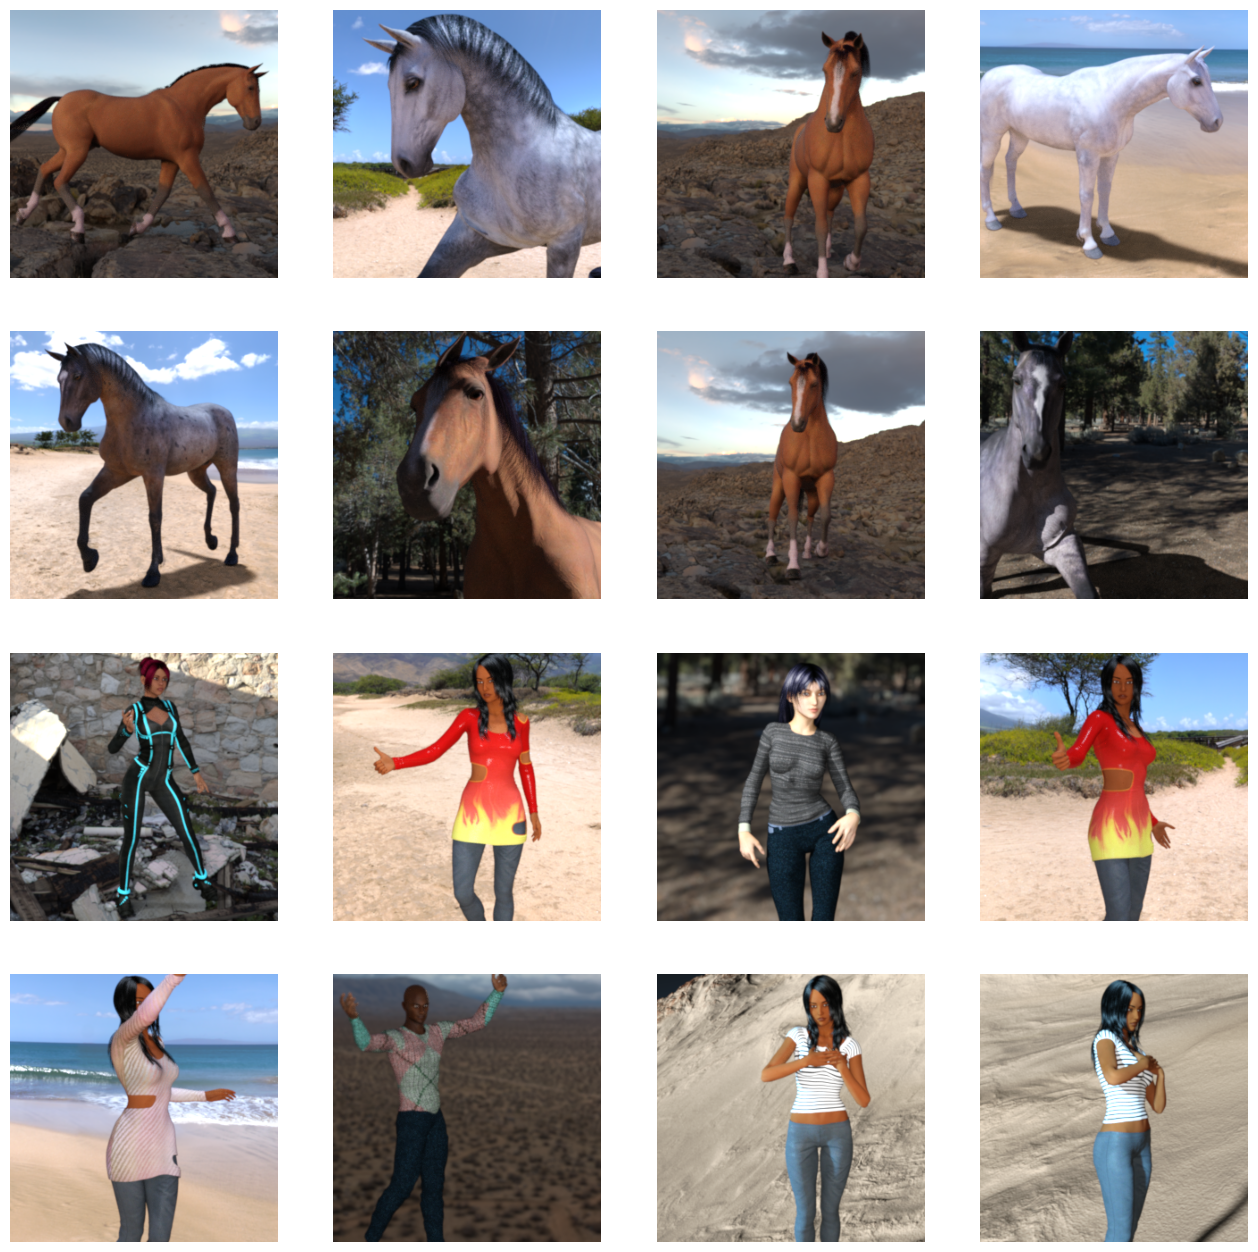

In [7]:
# Let's see what the pictures look like
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph
nrows = 4
ncols = 4

# Index for iterating over the images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [8]:
# Building the model
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
    ])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [14]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss= 'binary_crossentropy', metrics=['accuracy'])

In [15]:
# Data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the train images
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow images in batches of 128 using train_datagen
train_generator = train_datagen.flow_from_directory(
    './horse-or-human', target_size=(300, 300),
    batch_size=128, class_mode='binary')

# Resccale the validation images
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow images in batches of 128 using train_datagen
validation_generator = validation_datagen.flow_from_directory(
    './validation-horse-or-human', target_size=(300, 300),
    batch_size=32, class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [16]:
# Train the model
history = model.fit(train_generator, steps_per_epoch=8, epochs=15,
                    validation_data=validation_generator, validation_steps=8)

Epoch 1/15
8/8 [==============================] - 11s 979ms/step - loss: 0.8189 - accuracy: 0.6107 - val_loss: 0.5808 - val_accuracy: 0.8008
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 0.6582 - accuracy: 0.7597 - val_loss: 0.3140 - val_accuracy: 0.9297
Epoch 3/15
8/8 [==============================] - 10s 1s/step - loss: 0.2640 - accuracy: 0.9043 - val_loss: 3.2963 - val_accuracy: 0.5156
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 0.6685 - accuracy: 0.8387 - val_loss: 0.1935 - val_accuracy: 0.9297
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 0.1918 - accuracy: 0.9321 - val_loss: 0.1212 - val_accuracy: 0.9570
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 0.2098 - accuracy: 0.9132 - val_loss: 0.1747 - val_accuracy: 0.9492
Epoch 7/15
8/8 [==============================] - 10s 1s/step - loss: 0.1354 - accuracy: 0.9499 - val_loss: 0.1287 - val_accuracy: 0.9375
Epoch 8/15
8/8 [===================

In [17]:
## Prediction
## Upload a file of horse or human

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving child.jpg to child.jpg
Saving horse-img.jpg to horse-img.jpg
Saving horse2.jpg to horse2.jpg
Saving horses with humans.jpg to horses with humans.jpg
Saving lady.jpg to lady.jpg
Saving lady2.jpg to lady2.jpg
Saving man.jpg to man.jpg
1/1 [==============================] - 0s 263ms/step
[1.]
child.jpg is a human
1/1 [==============================] - 0s 19ms/step
[3.9578686e-15]
horse-img.jpg is a horse
1/1 [==============================] - 0s 19ms/step
[0.999972]
horse2.jpg is a human
1/1 [==============================] - 0s 20ms/step
[0.9958164]
horses with humans.jpg is a human
1/1 [==============================] - 0s 21ms/step
[0.99779934]
lady.jpg is a human
1/1 [==============================] - 0s 20ms/step
[6.705553e-13]
lady2.jpg is a horse
1/1 [==============================] - 0s 18ms/step
[1.]
man.jpg is a human
